https://github.com/kairess/cat_hipsterizer 의 코드를 참조함

# 데이터 준비

In [1]:
!pip install gdown

In [2]:
# orginal shared link : https://drive.google.com/file/d/1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ/view?usp=sharing
!gdown https://drive.google.com/uc?id=1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ

Downloading...
From: https://drive.google.com/uc?id=1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ
To: /content/cat_face_keypoint.zip
201MB [00:06, 39.5MB/s]


In [3]:
!unzip cat_face_keypoint.zip

Archive:  cat_face_keypoint.zip
  inflating: cat_image_and_keypoint.npy  
  inflating: memo.txt                


In [29]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
img_size = 224

https://www.kaggle.com/crawford/cat-dataset 의
고양이 영상 파일과 레이블링 데이터를 읽고 numpy 파일로 저장해 두었다. <br>


In [17]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

In [18]:
print(x.shape)
print(y.shape)

(1706, 224, 224, 3)
(1706, 18)


## 이미지 보기

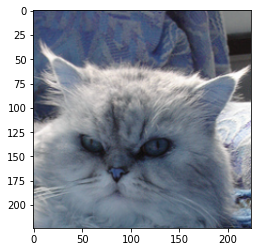

[ 59 135 128 137  85 177  32  93  19  48  50  64 172  72 205  67 188 106]


In [20]:
plt.imshow(x[0])
plt.show()
print(y[0])

## normalization

In [19]:
x = x / 255.

# 코 위치 탐지

## 키 포인트 보기

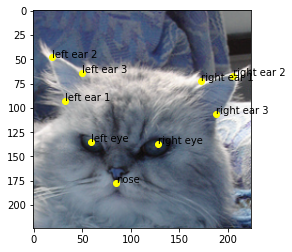

In [9]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)

plt.scatter(target_y[0], target_y[1], color='yellow')
plt.text(target_y[0], target_y[1], 'left eye')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[4], target_y[5], color='yellow')
plt.text(target_y[4], target_y[5], 'nose')
plt.scatter(target_y[6], target_y[7], color='yellow')
plt.text(target_y[6], target_y[7], 'left ear 1')
plt.scatter(target_y[8], target_y[9], color='yellow')
plt.text(target_y[8], target_y[9], 'left ear 2')
plt.scatter(target_y[10], target_y[11], color='yellow')
plt.text(target_y[10], target_y[11], 'left ear 3')
plt.scatter(target_y[12], target_y[13], color='yellow')
plt.text(target_y[12], target_y[13], 'right ear 1')
plt.scatter(target_y[14], target_y[15], color='yellow')
plt.text(target_y[14], target_y[15], 'right ear 2')
plt.scatter(target_y[16], target_y[17], color='yellow')
plt.text(target_y[16], target_y[17], 'right ear 3')

plt.show()

## 코만 추리기

코에 해당하는 인덱스 4,5만 추림

In [21]:
nose_y = y[:,4:6]

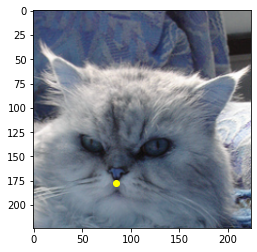

In [22]:
target_x = x[0]
target_y = nose_y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, nose_y, test_size=0.2, shuffle=True)

## 모델 정의

In [ ]:
conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2))

model.summary()

model.compile(optimizer='Adam', loss='mse')

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

## 학습

In [ ]:
model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1,
          callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, mode='auto')]
          )

Epoch 1/100
77/77 [==============================] - 21s 207ms/step - loss: 2156.5718 - val_loss: 7145.1030
Epoch 2/100
77/77 [==============================] - 15s 193ms/step - loss: 236.1216 - val_loss: 9658.9365
Epoch 3/100
77/77 [==============================] - 15s 194ms/step - loss: 90.3139 - val_loss: 10171.3066
Epoch 4/100
77/77 [==============================] - 15s 194ms/step - loss: 51.4822 - val_loss: 8661.4902
Epoch 5/100
77/77 [==============================] - 15s 192ms/step - loss: 41.8249 - val_loss: 7204.9644
Epoch 6/100
77/77 [==============================] - 15s 193ms/step - loss: 28.3717 - val_loss: 5443.7773
Epoch 7/100
77/77 [==============================] - 15s 192ms/step - loss: 18.3686 - val_loss: 4333.9946
Epoch 8/100
77/77 [==============================] - 15s 192ms/step - loss: 19.5558 - val_loss: 2945.7144
Epoch 9/100
77/77 [==============================] - 15s 193ms/step - loss: 14.5204 - val_loss: 2466.2495
Epoch 10/100
77/77 [======================

## 결과 보기

In [ ]:
predicted = model.predict(test_x[:16])

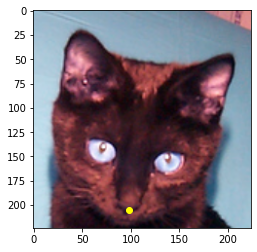

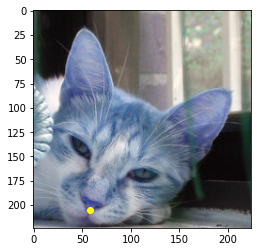

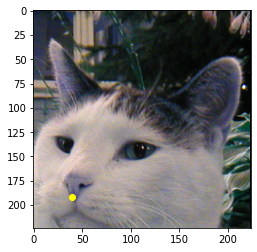

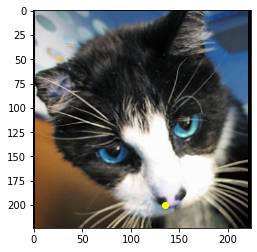

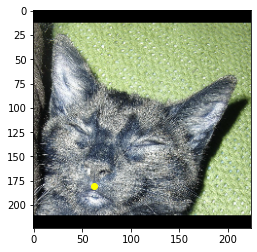

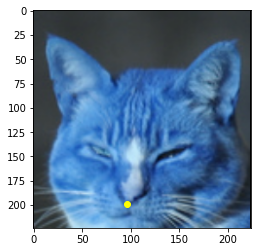

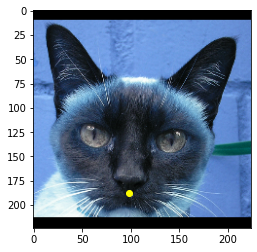

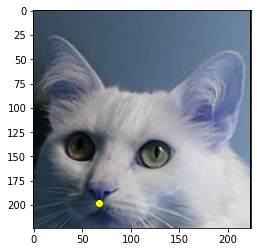

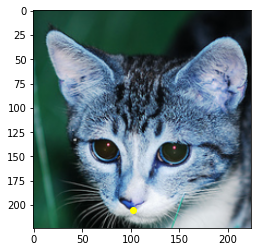

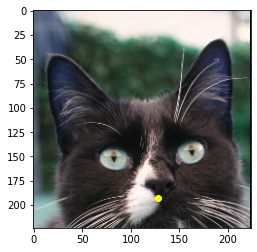

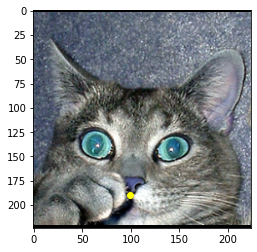

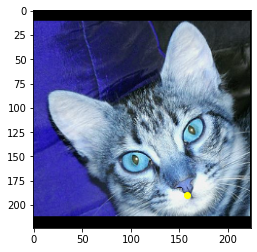

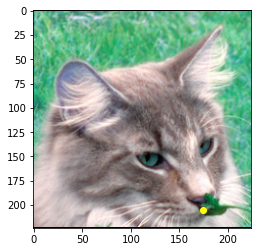

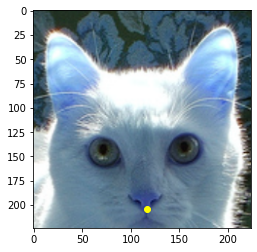

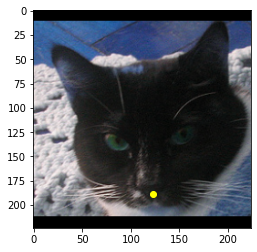

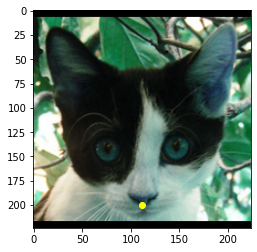

In [ ]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()

# 안경 씌우기

## 키 포인트 보기

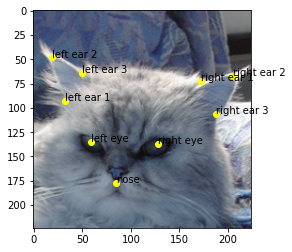

In [23]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)

plt.scatter(target_y[0], target_y[1], color='yellow')
plt.text(target_y[0], target_y[1], 'left eye')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[4], target_y[5], color='yellow')
plt.text(target_y[4], target_y[5], 'nose')
plt.scatter(target_y[6], target_y[7], color='yellow')
plt.text(target_y[6], target_y[7], 'left ear 1')
plt.scatter(target_y[8], target_y[9], color='yellow')
plt.text(target_y[8], target_y[9], 'left ear 2')
plt.scatter(target_y[10], target_y[11], color='yellow')
plt.text(target_y[10], target_y[11], 'left ear 3')
plt.scatter(target_y[12], target_y[13], color='yellow')
plt.text(target_y[12], target_y[13], 'right ear 1')
plt.scatter(target_y[14], target_y[15], color='yellow')
plt.text(target_y[14], target_y[15], 'right ear 2')
plt.scatter(target_y[16], target_y[17], color='yellow')
plt.text(target_y[16], target_y[17], 'right ear 3')

plt.show()

왼쪽눈과 오른쪽눈에 해당하는 0,1,2,3 만 추림

In [24]:
eye_y = y[:,0:4]

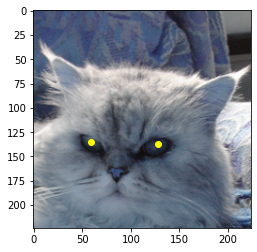

In [25]:
target_x = x[0]
target_y = eye_y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.show()

## 데이터 분리

In [26]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, eye_y, test_size=0.2, shuffle=True)

## 모델 정의

In [27]:
conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4))

model.summary()

model.compile(optimizer='Adam', loss='mse')

9420800/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________

## 학습

In [28]:
model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1,
          callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, mode='auto')]
          )

Epoch 1/100
77/77 [==============================] - 29s 128ms/step - loss: 1252.0997 - val_loss: 19675.3125
Epoch 2/100
77/77 [==============================] - 8s 109ms/step - loss: 178.2266 - val_loss: 12416.3145
Epoch 3/100
77/77 [==============================] - 8s 107ms/step - loss: 94.8124 - val_loss: 9632.7148
Epoch 4/100
77/77 [==============================] - 8s 107ms/step - loss: 62.0342 - val_loss: 6157.8589
Epoch 5/100
77/77 [==============================] - 8s 109ms/step - loss: 43.7548 - val_loss: 4615.6367
Epoch 6/100
77/77 [==============================] - 8s 107ms/step - loss: 35.0030 - val_loss: 3425.1162
Epoch 7/100
77/77 [==============================] - 8s 108ms/step - loss: 32.7192 - val_loss: 3117.0835
Epoch 8/100
77/77 [==============================] - 8s 108ms/step - loss: 28.7533 - val_loss: 1613.1667
Epoch 9/100
77/77 [==============================] - 8s 108ms/step - loss: 27.3725 - val_loss: 1555.9395
Epoch 10/100
77/77 [=============================

## 결과 보기

In [30]:
predicted = model.predict(test_x[:16])

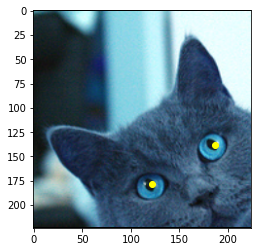

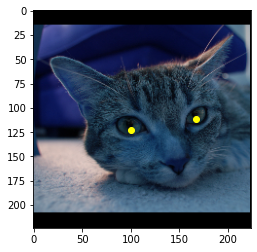

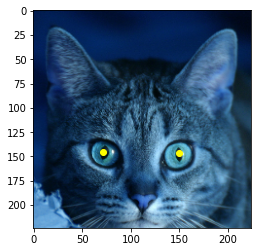

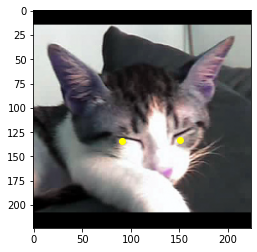

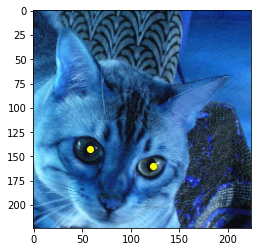

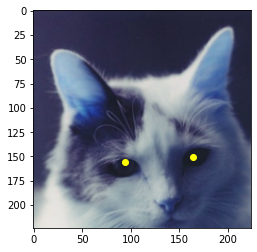

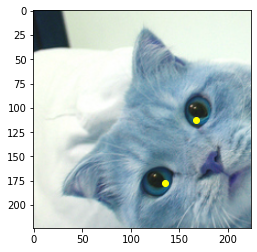

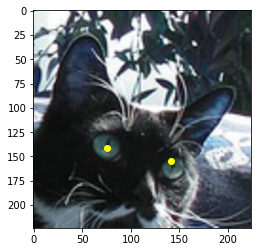

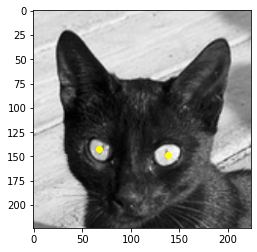

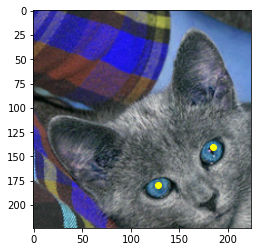

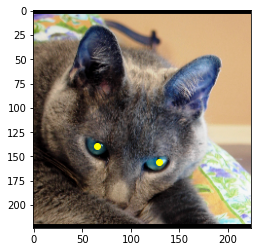

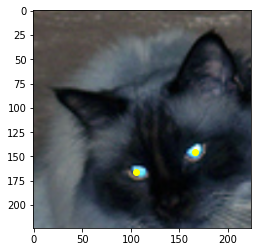

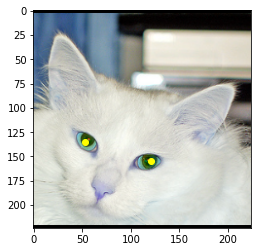

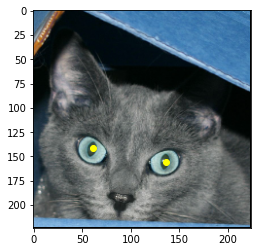

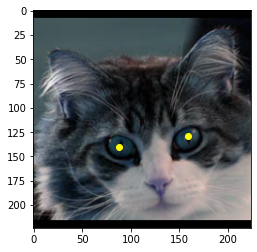

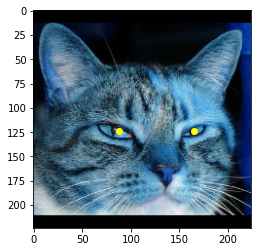

In [31]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.scatter(predicted[i][2], predicted[i][3], color='yellow')
  plt.show()

## 안경 겹쳐 그리기

In [278]:
!wget https://github.com/dhrim/slipp_study_2022_DL_competition/raw/master/material/deep_learning/data/glasses2.png

--2021-09-15 17:50:44--  https://github.com/dhrim/slipp_study_2022_DL_competition/raw/master/material/deep_learning/data/glasses2.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/slipp_study_2022_DL_competition/master/material/deep_learning/data/glasses2.png [following]
--2021-09-15 17:50:45--  https://raw.githubusercontent.com/dhrim/slipp_study_2022_DL_competition/master/material/deep_learning/data/glasses2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40856 (40K) [image/png]
Saving to: ‘glasses2.png’

glasses2.png        100%[===================>]  39.90K  --.-KB/s    in 0.009s 

In [279]:
import keras, sys, cv2, os
from math import atan2, degrees
from google.colab.patches import cv2_imshow

In [280]:
glasses = cv2.imread('glasses2.png', cv2.IMREAD_UNCHANGED)

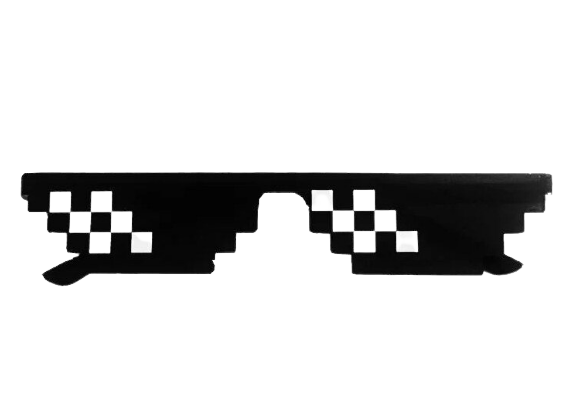

In [281]:
cv2_imshow(glasses)

대부분 https://github.com/kairess/cat_hipsterizer/blob/master/test.py 의 코드를 참조함.

In [282]:
def angle_between(p1, p2):
  xDiff = p2[0] - p1[0]
  yDiff = p2[1] - p1[1]
  return degrees(atan2(yDiff, xDiff))

def overlay_transparent(background_img, img_to_overlay_t, overlay_x, overlay_y, overlay_size=None):

  x = int(overlay_x)
  y = int(overlay_y)
  bg_img = background_img.copy()

  if bg_img.shape[2] == 3:
    bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2BGRA)

  if overlay_size is not None:
    img_to_overlay_t = cv2.resize(img_to_overlay_t.copy(), overlay_size)

  if len(img_to_overlay_t.shape)==3:
      img_to_overlay_t = cv2.cvtColor(img_to_overlay_t, cv2.COLOR_BGR2BGRA)

  b, g, r, a = cv2.split(img_to_overlay_t)

  mask = cv2.medianBlur(a, 1)

  h, w, _ = img_to_overlay_t.shape
  roi = bg_img[int(y-h/2):int(y-h/2+h), int(x-w/2):int(x-w/2+w)]

  img1_bg = cv2.bitwise_and(roi.copy(), roi.copy(), mask=cv2.bitwise_not(mask))
  img2_fg = cv2.bitwise_and(img_to_overlay_t, img_to_overlay_t, mask=mask)

  bg_img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)] = cv2.add(img1_bg, img2_fg, dtype=cv2.CV_64F)

  bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGRA2BGR)

  return bg_img

def load_rotated_glasses(left_eye_xy, right_eye_xy):
  angle = -angle_between(left_eye_xy, right_eye_xy)
  M = cv2.getRotationMatrix2D((glasses.shape[1] / 2, glasses.shape[0] / 2), angle, 1)
  rotated_glasses = cv2.warpAffine(glasses, M, (glasses.shape[1],glasses.shape[0]))
  return rotated_glasses

def show_glass_wearing(target_image, left_eye_xy, right_eye_xy):

  rotated_glasses = load_rotated_glasses(left_eye_xy, right_eye_xy)
  eye_center_x, eye_center_y = np.mean([left_eye_xy, right_eye_xy], axis=0)
  eye_distance = np.linalg.norm(right_eye_xy - left_eye_xy) * 2 * 0.9
  overlay_size=(int(eye_distance), int(glasses.shape[0] * eye_distance / glasses.shape[1]))  
  result_img = overlay_transparent(target_image, rotated_glasses, eye_center_x, eye_center_y, overlay_size)

  plt.imshow(result_img)
  plt.show()


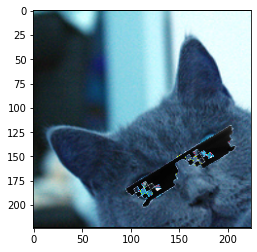

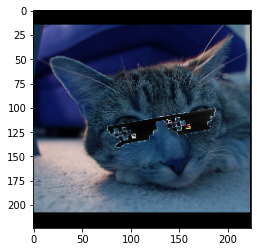

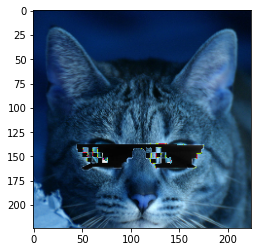

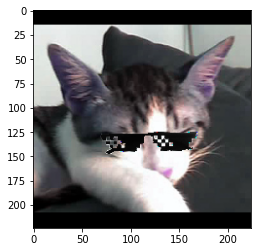

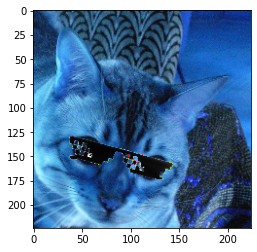

In [275]:
for i in range(5):
  target_image = (test_x[i]*255).astype(np.uint8)
  left_eye_xy = predicted[i][0:2]
  right_eye_xy = predicted[i][2:4]
  show_glass_wearing(target_image, left_eye_xy, right_eye_xy)